In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 결측치 채우기

In [13]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['age'].isna().sum()

0

In [15]:
titanic['embarked'].value_counts()
titanic['embarked'] = titanic['embarked'].fillna("S")
titanic['embarked'].isna().sum()

0

In [16]:
titanic['embark_town'].value_counts()
titanic['embark_town'] = titanic['embark_town'].fillna("Southampton")
titanic['embark_town'].isna().sum()

0

In [18]:
titanic['deck'].value_counts()
titanic['deck'] = titanic['deck'].fillna('C')
titanic['deck'].isna().sum()

0

In [19]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [23]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,216,216,216,216,216,216,216,216,216,216,216
Second,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Third,491,491,491,491,491,491,491,491,491,491,491,491,491,491


In [26]:
titanic.pivot_table(index='class', columns='who', values='survived')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


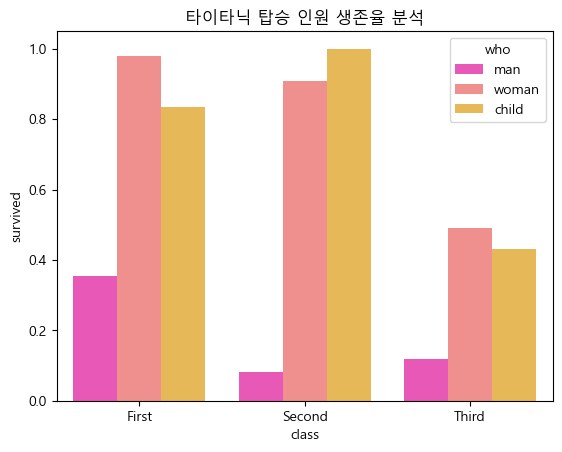

In [37]:
plt.rc('font', family='Malgun Gothic')

sns.barplot(titanic, x='class', y='survived', hue='who', errorbar=None, palette='spring')
plt.title('타이타닉 탑승 인원 생존율 분석')
plt.show()

# 나이별 생존율

In [38]:
age_survival_rate = titanic.groupby(pd.cut(titanic['age'], 
                                           bins=[0, 10, 20, 30, 40, 50, 60, 70, 80]))['survived'].mean()
age_survival_rate

age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: survived, dtype: float64

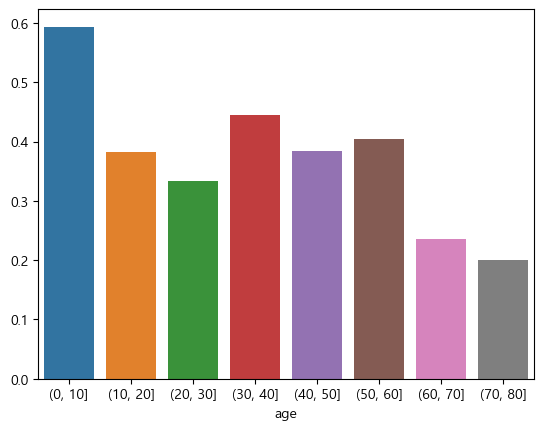

In [40]:
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)
plt.show()

[(0, 30], (30, 40], (40, 100], (0, 30], (40, 100], (0, 30], (40, 100], (30, 40]]
Categories (3, interval[int64, right]): [(0, 30] < (30, 40] < (40, 100]]


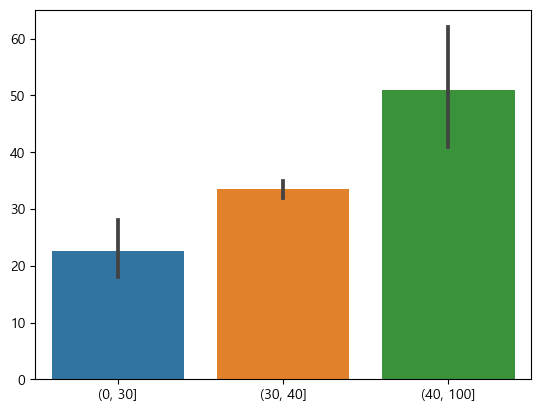

In [47]:
ages = [22, 35, 50, 18, 62, 28, 41, 32]
bins = [0, 30, 40, 100]

category = pd.cut(ages, bins)
print(category)
sns.barplot(x=category, y=ages)
plt.show()